In [ ]:
import warnings
import PyPDF2
import textract
import nltk, re, pprint
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models import Word2Vec
from matplotlib import pyplot

In [ ]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
filename = '/Users/michael/Documents/Ariadne/GSX/DebtProspectusHandbook-GSX-MM.pdf'
pdfFileObj = open(filename,'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
info = pdfReader.getDocumentInfo()
print(info)
num_pages = pdfReader.numPages
print(num_pages)

In [ ]:
pageData = pdfReader.getPage(2)
pageText = pageData.extractText()
len(clean_sentences(pageText))

In [467]:
r = re.compile(r"\.?\d*.\d*.\d*\.?\b")
pageData = pdfReader.getPage(16)
pageText = pageData.extractText()
pageText = re.sub(r'-\n(\w+ *)', r'\1', pageText)
# print(text)
sentences = pageText.split('\n')
# print(len(sentences))
# print(sentences[:20])
cleaned = [word for word in sentences 
                if not word in stop_words 
                and not word in punctuation 
                and word not in non_words
                and not r.match(word)
                and len(word) > 3]
print(len(cleaned))
# print(cleaned[:20])
tokens = tokenize(pageText)
print(len(tokens))
# print(tokens)

40
109


In [ ]:
def chomp(x):
    if x.endswith("\r\n"): return x[:-2]
    if x.endswith("\n") or x.endswith("\r"): return x[:-1]
    return x

In [342]:
regex = re.compile(r"\.?\d*.\d*.\d*\.?\b")
if regex.match('0.61.2'): print ('it matches 1!')
if regex.match('.3.9'): print ('it matches 2!')
if regex.match('1.10'): print ('it matches 3!')
if regex.match('1.10.'): print ('it matches 4!')
if regex.match('09.00'): print ('it matches 5!')
if regex.match(' 9.1 '): print ('it matches 6!')
    
# .3.9 -> 1; 09.00 -> 1; 1.10

it matches 1!
it matches 2!
it matches 3!
it matches 4!
it matches 5!
it matches 6!


In [562]:
def tokenize(text):
    r = re.compile(r"\.?\d*.\d*.\d*\.?\b")
    text = re.sub(r'-\n(\w+ *)', r'\1', text)
    punctuation = ['(',')',';',':','[',']',',', '-', '/']
    stop_words = stopwords.words('english')
    non_words = ['...', '..', '.']
    tokens = word_tokenize(text)
    keywords = [word.lower() for word in tokens 
                if not word in stop_words 
                and not word in punctuation 
                and word not in non_words
                and not r.match(word)
                and not word.startswith('................')                
                and len(word) > 3]
    return keywords

In [469]:
def join_split_words(text):
    return re.sub(r'-\n(\w+ *)', r'\1', text)

In [456]:
def clean_sentences(pageText):
    punctuation = ['(',')',';',':','[',']',',', '-', '/']
    stop_words = stopwords.words('english')
    non_words = ['...', '..', '.', '']
    r = re.compile(r"\.?\d*.\d*.\d*\.?\b")
    pageText = join_split_words(pageText)
    sentences = pageText.split('\n')
    sentences = [word for word in sentences if len(word.strip()) > 0]
    cleanedSentences = [word.strip() for word in sentences 
                if not word in stop_words 
                and not word in punctuation 
                and word not in non_words
                and not r.match(word)
                and not word.startswith('................')
                and len(word) > 3]
    return cleanedSentences

In [470]:
count = 0
document_text = ""
while count < num_pages:
    page = pdfReader.getPage(count)
    count +=1
    pageText = page.extractText()
    pageText = join_split_words(pageText)
    document_text += pageText

In [471]:
count = 0
pages = []
sentences = []
while count < num_pages:
    pageData = pdfReader.getPage(count)
    count +=1
    pageText = pageData.extractText()
    sentences.extend(clean_sentences(pageText))
    page = tokenize(pageText)
    pages.append(page)

In [ ]:
print(len(pages))
print(len(sentences))
print(len(document_text))
print(len(text))

In [490]:
r = re.compile(r"\.?\d*.\d*.\d*\.?\b")
tokens = word_tokenize(prin_text)
punctuation = ['(',')',';',':','[',']',',', '-', '/']
stop_words = stopwords.words('english')
non_words = ['...', '..', '.']
keywords = [word.lower() for word in tokens 
            if not word in stop_words 
            and not word in punctuation 
            and word not in non_words
            and not r.match(word)
            and not word.startswith('................')            
            and len(word) > 3]

In [491]:
print(len(keywords))
keywords[:10]

2627


['principles',
 'businesses',
 'prin',
 'contents',
 'principles',
 'businesses',
 'prin',
 'annex',
 'prin',
 'prin']

In [492]:
counter = Counter(keywords)
print(len(counter.items()))
counter.most_common()[:10]

665


[('prin', 122),
 ('principles', 87),
 ('firm', 72),
 ('activities', 46),
 ('business', 41),
 ('client', 40),
 ('www.handbook.fca.org.uk', 37),
 ('release', 37),
 ('principle', 37),
 ('rules', 31)]

In [569]:
keywords[:10], prin_pages[:10]

(['principles',
  'businesses',
  'prin',
  'contents',
  'principles',
  'businesses',
  'prin',
  'annex',
  'prin',
  'prin'],
 [['principles',
   'businesses',
   'prin',
   'contents',
   'principles',
   'businesses',
   'prin',
   'annex',
   'prin',
   'prin',
   'prin',
   'introduction',
   'application',
   'purpose',
   'clients',
   'principles',
   'non-designated',
   'investment',
   'business',
   'clients',
   'treat',
   'eligible',
   'counterparty',
   'purposes',
   'prin',
   'principles',
   'principles',
   'rules',
   'application',
   'what',
   'where',
   'general',
   'principles',
   'mifid',
   'business',
   'principles',
   'mifid',
   'business',
   'transitional',
   'provisions',
   'schedules',
   'prin–i',
   'transitional',
   'provisions',
   'record',
   'keeping',
   'requirements',
   'notiﬁcation',
   'requirements',
   'fees',
   'required',
   'payments',
   'powers',
   'exercised',
   'rights',
   'action',
   'damages',
   'rules',
   '

In [494]:
nltk_text = nltk.Text(keywords)

In [495]:
print(type(nltk_text))
print(len(nltk_text))

<class 'nltk.text.Text'>
2627


In [496]:
nltk_text

<Text: principles businesses prin contents principles businesses prin annex...>

In [497]:
nltk_text.collocations()

eligible counterparty; risk transformation; www.handbook.fca.org.uk
release; united kingdom; insurance risk; mifid business; principles
businesses; regulated activities; directly arising; firm must;
designated investment; equivalent currency; principles mifid; record
keeping; release www.handbook.fca.org.uk; pension scheme; credit-
related regulated; client categorisation; investment business; arising
insurance


In [498]:
nltk_text.concordance('transformation')

Displaying 11 of 11 matches:
estment business insurance risk transformation activities directly arising ins
directly arising insurance risk transformation activities described prin relat
estment business insurance risk transformation activities directly arising ins
directly arising insurance risk transformation firm categorisation client cobs
elation carrying insurance risk transformation activities directly arising ins
directly arising insurance risk transformation cobs client categorisation chap
estment business insurance risk transformation activities directly arising ins
directly arising insurance risk transformation example general insurance busin
directly arising insurance risk transformation prin also applies respect commu
g carry carrying insurance risk transformation activities directly arising ins
directly arising insurance risk transformation client categorisationestablishe


In [499]:
fdist = nltk.FreqDist(keywords)

In [500]:
fdist.most_common()[-10:]

[('power', 1),
 ('waive', 1),
 ('made', 1),
 ('code', 1),
 ('particulars', 1),
 ('incorporate', 1),
 ('laid', 1),
 ('possible', 1),
 ('grant', 1),
 ('incompatible', 1)]

In [501]:
fdist.most_common(10)

[('prin', 122),
 ('principles', 87),
 ('firm', 72),
 ('activities', 46),
 ('business', 41),
 ('client', 40),
 ('www.handbook.fca.org.uk', 37),
 ('release', 37),
 ('principle', 37),
 ('rules', 31)]

In [502]:
for word in sorted(fdist):
    if (fdist[word]) > 0:
        print(word, '->', fdist[word], end='; ')

abide -> 1; ability -> 2; able -> 1; abroad -> 1; absence -> 1; accepting -> 3; accordance -> 2; accordingly -> 1; account -> 4; acting -> 3; action -> 11; actionable -> 4; actions -> 3; activities -> 46; activity -> 13; added -> 1; addition -> 1; adequacy -> 1; adequate -> 5; administering -> 1; administers -> 1; administrator -> 2; administrators -> 1; advice -> 4; advised -> 1; affairs -> 2; affect -> 1; agency -> 1; agent -> 4; aggregating -> 1; agreement -> 3; aifm -> 2; allowed -> 1; also -> 6; alternatively -> 1; although -> 1; ancillary -> 2; annex -> 17; another -> 6; anything -> 3; appears -> 1; appendix -> 1; applicable -> 7; application -> 26; applications -> 1; applied -> 2; applies -> 21; apply -> 23; appointed -> 3; approach -> 2; appropriate -> 4; appropriately -> 1; approval -> 3; arising -> 6; arrange -> 1; article -> 4; articles -> 2; asset -> 1; assets -> 7; associate -> 1; association -> 1; auction -> 1; authorised -> 3; authorities -> 1; authority -> 3; automatica

11; taken -> 2; taking -> 1; territorial -> 8; territory -> 2; tests -> 1; there -> 2; therefore -> 2; these -> 2; they -> 2; third -> 2; this -> 4; threshold -> 3; time -> 8; top-up -> 1; total -> 1; trading -> 4; transaction -> 1; transactions -> 3; transformation -> 11; transitional -> 8; treat -> 5; treated -> 1; treatment -> 1; treaty -> 2; trigger -> 1; trust -> 5; trustee -> 3; turnover -> 1; type -> 1; types -> 1; ucits -> 2; unauthorised -> 2; under -> 6; unforeseeable -> 1; unforeseen -> 1; unincorporated -> 1; united -> 8; unless -> 2; unregulated -> 1; upon -> 3; utilise -> 1; value -> 1; varies -> 1; vary -> 1; view -> 1; viewed -> 1; waive -> 1; waived -> 4; waiver -> 2; warning -> 1; well -> 2; what -> 6; where -> 6; wherever -> 5; whether -> 8; whole -> 1; whose -> 3; wider -> 5; willing -> 1; within -> 1; without -> 4; world-wide -> 4; would -> 11; writing -> 1; written -> 4; www.handbook.fca.org.uk -> 37; year -> 1; years -> 1; 

In [541]:
print(prin_sentences[:10])
print('------------')
print(pages[:2])

['Principles for', 'Businesses', 'PRIN Contents', 'Principles for Businesses', 'PRIN 1', 'PRIN 2', 'PRIN 3', 'PRIN 4', 'Introduction', 'Application and purpose']
------------
[['main', 'market', 'prospectus', 'handbook', 'debt', 'securities', 'march'], ['limited', 'prospectus', 'handbook', 'page', 'debt', 'securities', 'main', 'market', 'march', 'contents', 'introduction', 'preparing', 'prospectus', 'definitions', 'section', 'prospectuses', 'structure', 'content', 'publication', 'structure', 'content', 'base', 'prospectus', 'validity', 'publication', 'languages', 'advertising', 'section', 'approval', 'prospectus', 'admissibility', 'listing', 'draft', 'documents', 'submitted', 'review', 'omission', 'information', 'approval', 'prospectus', 'admissibility', 'listing', 'application', 'listing', 'trading', 'offering', 'programmes', 'appendix', 'prospectus', 'disclosure', 'require', 'ments', 'appendix', 'annex', 'minimum', 'disclosure', 'requirements', 'debt', 'derivative', 'securities', 're

In [565]:
# model = Word2Vec(pages, min_count=10)
model = Word2Vec(prin_pages)

In [566]:
print(pages[:2])
prin_pages[:1]

[['main', 'market', 'prospectus', 'handbook', 'debt', 'securities', 'march'], ['limited', 'prospectus', 'handbook', 'page', 'debt', 'securities', 'main', 'market', 'march', 'contents', 'introduction', 'preparing', 'prospectus', 'definitions', 'section', 'prospectuses', 'structure', 'content', 'publication', 'structure', 'content', 'base', 'prospectus', 'validity', 'publication', 'languages', 'advertising', 'section', 'approval', 'prospectus', 'admissibility', 'listing', 'draft', 'documents', 'submitted', 'review', 'omission', 'information', 'approval', 'prospectus', 'admissibility', 'listing', 'application', 'listing', 'trading', 'offering', 'programmes', 'appendix', 'prospectus', 'disclosure', 'require', 'ments', 'appendix', 'annex', 'minimum', 'disclosure', 'requirements', 'debt', 'derivative', 'securities', 'registration', 'document', 'schedule', 'persons', 'responsible', 'statutory', 'auditors', 'selected', 'financial', 'information', 'risk', 'factors', 'information', 'about', 'iss

[['principles',
  'businesses',
  'prin',
  'contents',
  'principles',
  'businesses',
  'prin',
  'annex',
  'prin',
  'prin',
  'prin',
  'introduction',
  'application',
  'purpose',
  'clients',
  'principles',
  'non-designated',
  'investment',
  'business',
  'clients',
  'treat',
  'eligible',
  'counterparty',
  'purposes',
  'prin',
  'principles',
  'principles',
  'rules',
  'application',
  'what',
  'where',
  'general',
  'principles',
  'mifid',
  'business',
  'principles',
  'mifid',
  'business',
  'transitional',
  'provisions',
  'schedules',
  'prin–i',
  'transitional',
  'provisions',
  'record',
  'keeping',
  'requirements',
  'notiﬁcation',
  'requirements',
  'fees',
  'required',
  'payments',
  'powers',
  'exercised',
  'rights',
  'action',
  'damages',
  'rules',
  'waived',
  'www.handbook.fca.org.uk',
  'release',
  'principles',
  'businesses',
  'chapter',
  'introduction',
  'release',
  'www.handbook.fca.org.uk',
  'prin']]

In [567]:
print(model)
words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=112, size=100, alpha=0.025)
['principles', 'businesses', 'prin', 'annex', 'introduction', 'application', 'purpose', 'clients', 'investment', 'business', 'treat', 'eligible', 'counterparty', 'purposes', 'rules', 'what', 'where', 'general', 'mifid', 'requirements', 'action', 'www.handbook.fca.org.uk', 'release', 'chapter', 'section', 'apply', 'part', 'firm', 'firms', 'incoming', 'obligations', 'regulatory', 'market', 'deleted', 'permission', 'whether', 'group', 'activities', 'management', 'control', 'financial', 'regulators', 'take', 'members', 'example', 'risk', 'systems', 'principle', 'relevant', 'united', 'kingdom', 'integrity', 'skill', 'care', 'diligence', 'prudential', 'conduct', 'applies', 'relation', 'carried', 'overseas', 'regulator', 'extent', 'also', 'guidance', 'under', 'would', 'reasonable', 'order', 'person', 'applicable', 'customers', 'client', 'assets', 'impose', 'customer', 'adequate', 'information', 'insurance', 'categorisation', 'credit-related', 'regula

In [570]:
print(model['institution'])

[-5.0213435e-03  6.2974746e-04  5.1521286e-03  1.0252582e-03
  1.2899387e-03 -5.0930129e-03  3.2794564e-03 -4.3485477e-03
 -3.1332839e-03 -2.1328698e-03  4.9806018e-03  5.1508229e-03
  2.0799513e-03 -4.6827330e-04  6.5459439e-04  1.0031991e-03
 -2.7206300e-03  4.0326850e-03  3.6637606e-03  1.0541379e-03
 -2.3737103e-03  4.0022857e-03 -1.4249919e-03  8.1501843e-05
 -2.0564015e-03 -4.8468113e-03  2.2921232e-03  8.5214881e-04
 -1.1864038e-03 -3.6832162e-03 -1.5104074e-03  1.0480433e-03
  2.2678135e-03 -2.0381785e-03  1.8342450e-03 -3.4914175e-03
 -3.9355173e-03  6.3872279e-04 -2.5548476e-03 -4.1409843e-03
  1.9957442e-04  1.3455154e-03 -2.2411933e-04  2.2936475e-03
  2.2309588e-03  8.3638192e-04  2.1666130e-03  4.8232274e-03
 -2.8574923e-03 -2.9579026e-03 -8.4100472e-04 -7.0169714e-04
 -3.2915368e-03  3.0660239e-04  1.6689802e-03  1.9032073e-03
 -2.9124790e-03  2.9813943e-03  5.2675226e-04  5.9072170e-03
  3.1165557e-03  6.3434779e-03 -3.0150830e-03 -5.4954677e-03
  4.3345630e-04 -5.86200

In [571]:
vocab_item =  model.wv.vocab['institution']
vocab_item.count

5

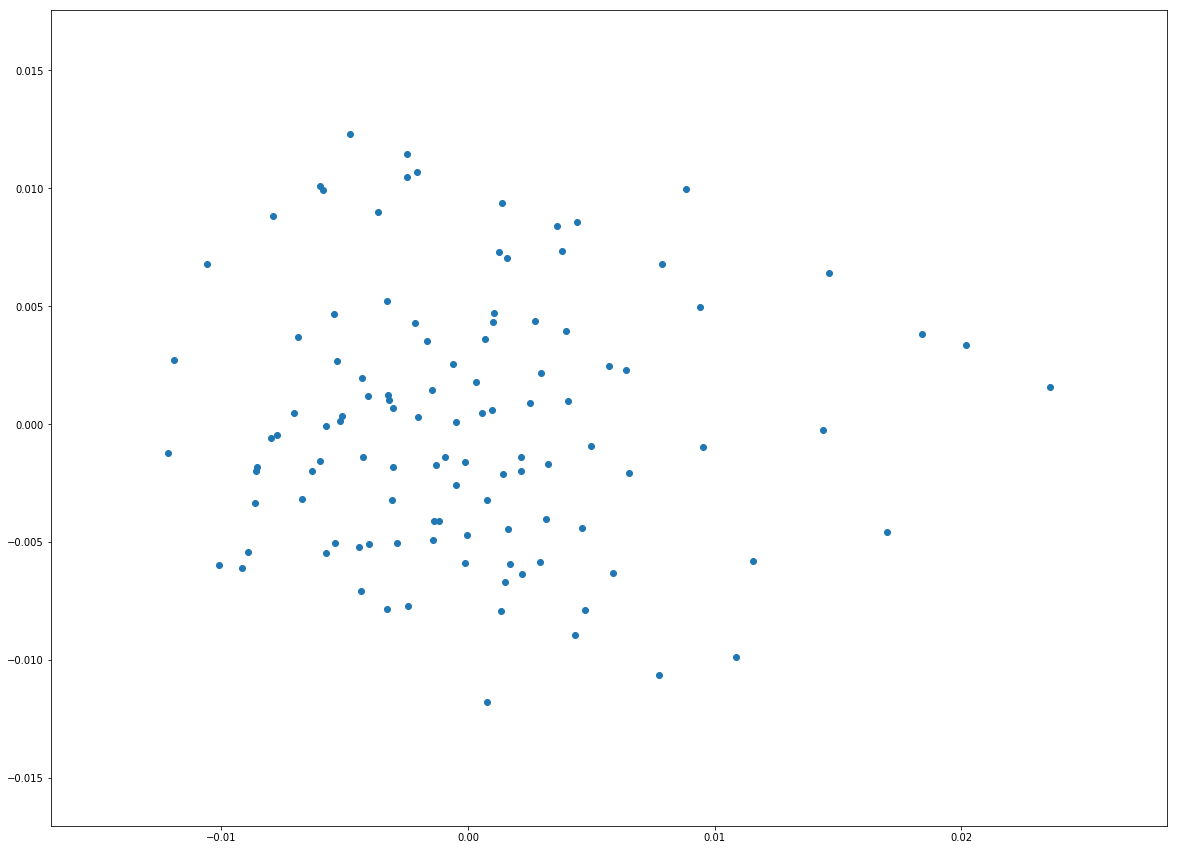

In [572]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = model[model.wv.vocab]
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
pyplot.show()

In [573]:
words = list(model.wv.vocab)
print(len(words))
print(words[:50])

112
['principles', 'businesses', 'prin', 'annex', 'introduction', 'application', 'purpose', 'clients', 'investment', 'business', 'treat', 'eligible', 'counterparty', 'purposes', 'rules', 'what', 'where', 'general', 'mifid', 'requirements', 'action', 'www.handbook.fca.org.uk', 'release', 'chapter', 'section', 'apply', 'part', 'firm', 'firms', 'incoming', 'obligations', 'regulatory', 'market', 'deleted', 'permission', 'whether', 'group', 'activities', 'management', 'control', 'financial', 'regulators', 'take', 'members', 'example', 'risk', 'systems', 'principle', 'relevant', 'united']


In [379]:
pyplot.rcParams["figure.figsize"] = 20,15

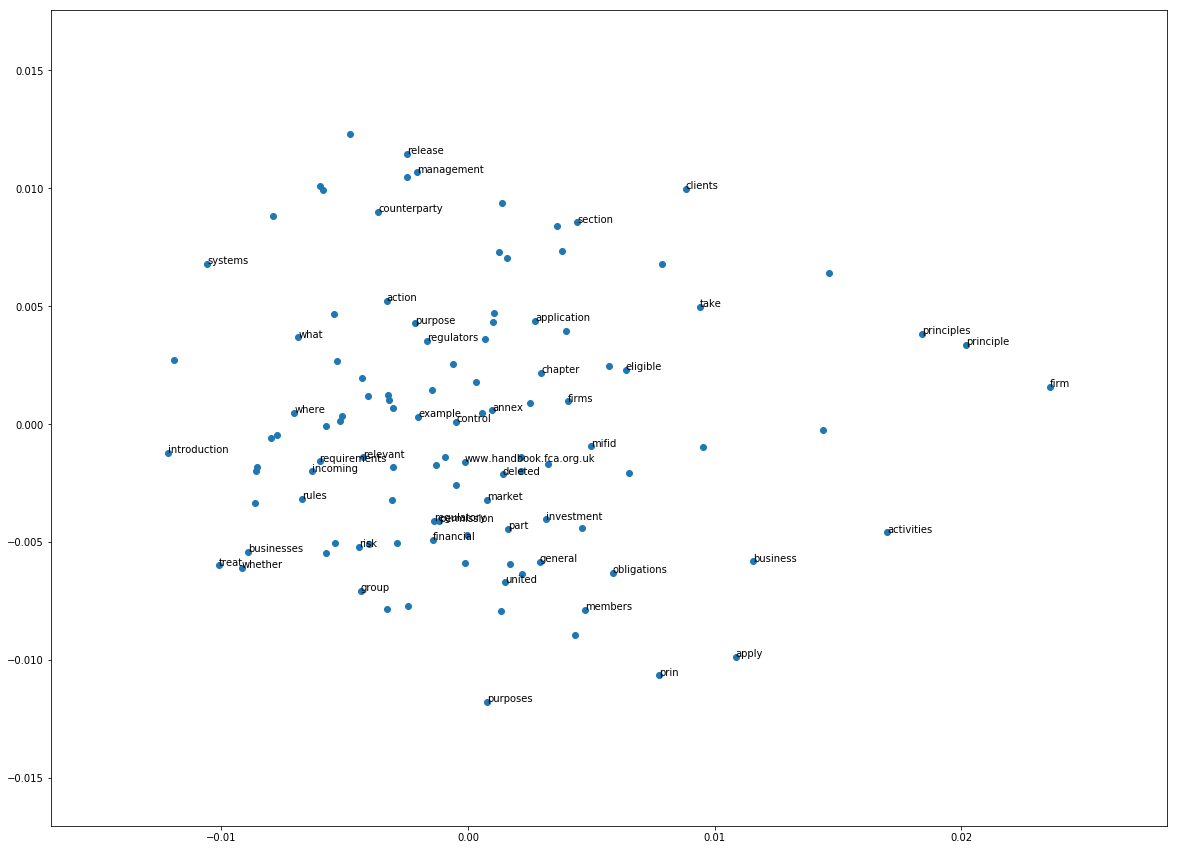

In [574]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [381]:
model.similarity('management', 'principal')

0.99956733

In [382]:
model.most_similar(negative=['management'])

[('limited', -0.9875125288963318),
 ('page', -0.9880432486534119),
 ('handbook', -0.9906636476516724),
 ('appendix', -0.994035005569458),
 ('main', -0.9956262111663818),
 ('march', -0.9958994388580322),
 ('debt', -0.99639892578125),
 ('experts', -0.9976121187210083),
 ('xxii', -0.9980246424674988),
 ('expert', -0.9980771541595459)]

In [383]:
model.most_similar(positive=['management'])

[('bodies', 0.9998058676719666),
 ('administrative', 0.9997662305831909),
 ('supervisory', 0.9997618198394775),
 ('assumptions', 0.9996834993362427),
 ('members', 0.9996642470359802),
 ('issuer', 0.9996471405029297),
 ('member', 0.999613344669342),
 ('relating', 0.999591052532196),
 ('respect', 0.9995837211608887),
 ('rights', 0.999580979347229)]

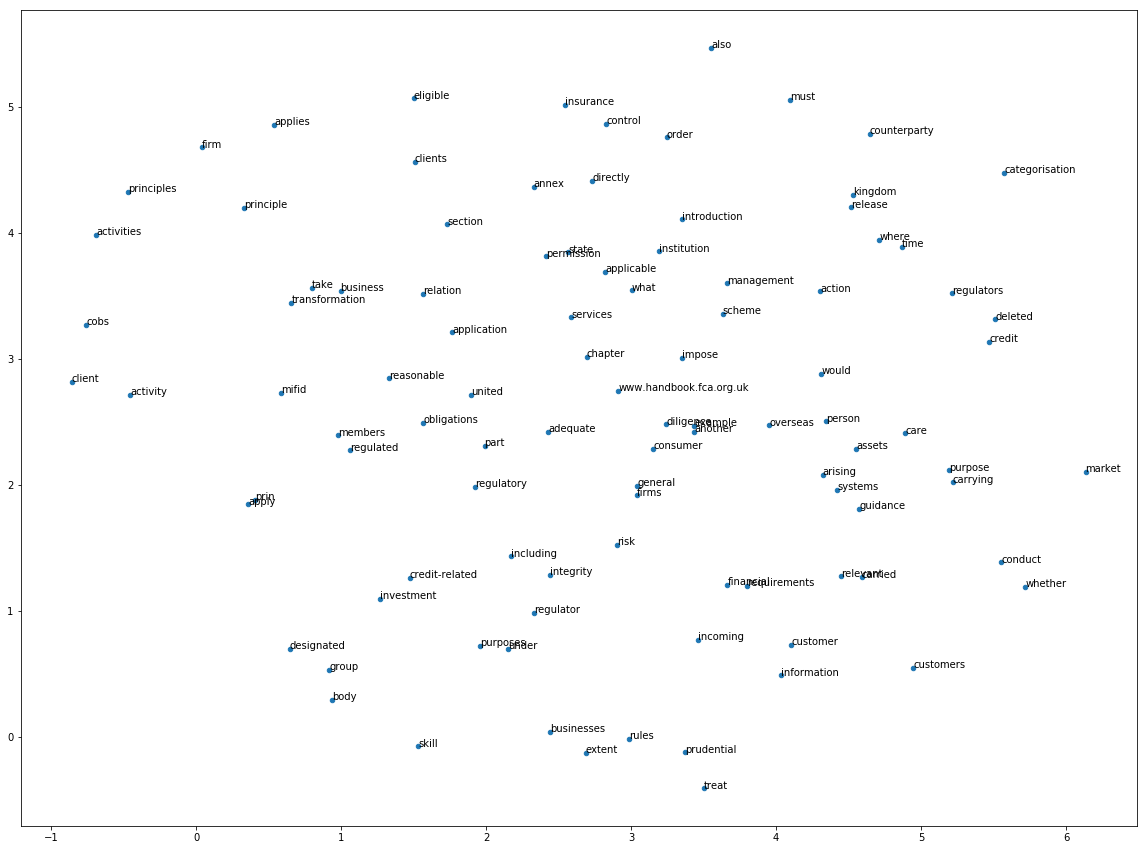

In [584]:
import numpy as np
labels = []
count = 0
max_count = 100
X = np.zeros(shape=(max_count,len(model['principles'])))

for term in list(model.wv.vocab):
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()